In [88]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

   ## Dataset

### Importing Dataset 
#### Dataset gotten from: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset

In [89]:
df= pd.read_csv(r'C:\Users\HP\Downloads\customer_purchase_data.csv')

In [90]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


### Interpretation of the Column
#### Age: Customer's age
#### Gender: Customer's gender (0: Male, 1: Female)
#### Annual Income: Annual income of the customer in dollars
#### Number of Purchases: Total number of purchases made by the customer
#### Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
#### Time Spent on Website: Time spent by the customer on the website in minutes
#### Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
#### Discounts Availed: Number of discounts availed by the customer (range: 0-5)
#### PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)
#### Target Variable:
#### Distribution of the Target Variable (PurchaseStatus):

#### 0 (No Purchase): 48%
#### 1 (Purchase): 52%

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [92]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [93]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


### Data Cleaning

In [94]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

### EDA

In [95]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [96]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


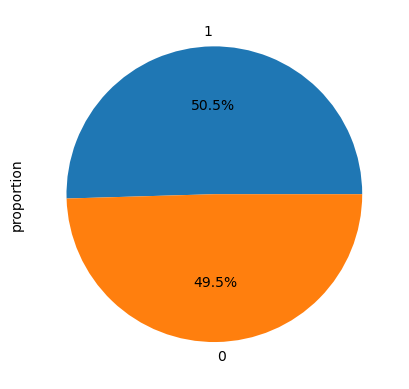

In [97]:
df["Gender"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')
plt.show()

##### There are 50.5 % female and 40.5% of the customers are male

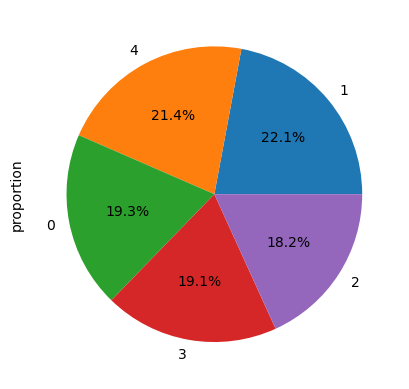

In [98]:
df["ProductCategory"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')
plt.show()

##### The Clothing category have the most customers followed by the sports then the Electronics ,then the Beauty then the Home goods 

In [110]:
def bar_show(a,b):
     avg_over_time = df.groupby(a)[b].sum().sort_values(ascending=True).reset_index()
     ax = avg_over_time.plot(kind='bar', figsize=(12, 8), title=b+ ' by ' +a, xlabel =a , ylabel='Sum of Purchases', legend=False)
     ax.bar_label(ax.containers[0], label_type='edge')
     ax.margins(y=0.1)

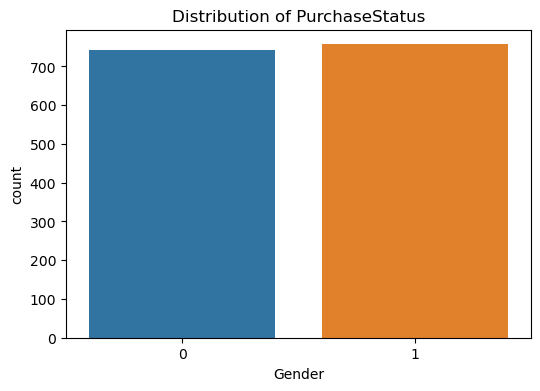

In [111]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of PurchaseStatus')
plt.show()

In [101]:
df['Gender'].value_counts()

Gender
1    757
0    743
Name: count, dtype: int64

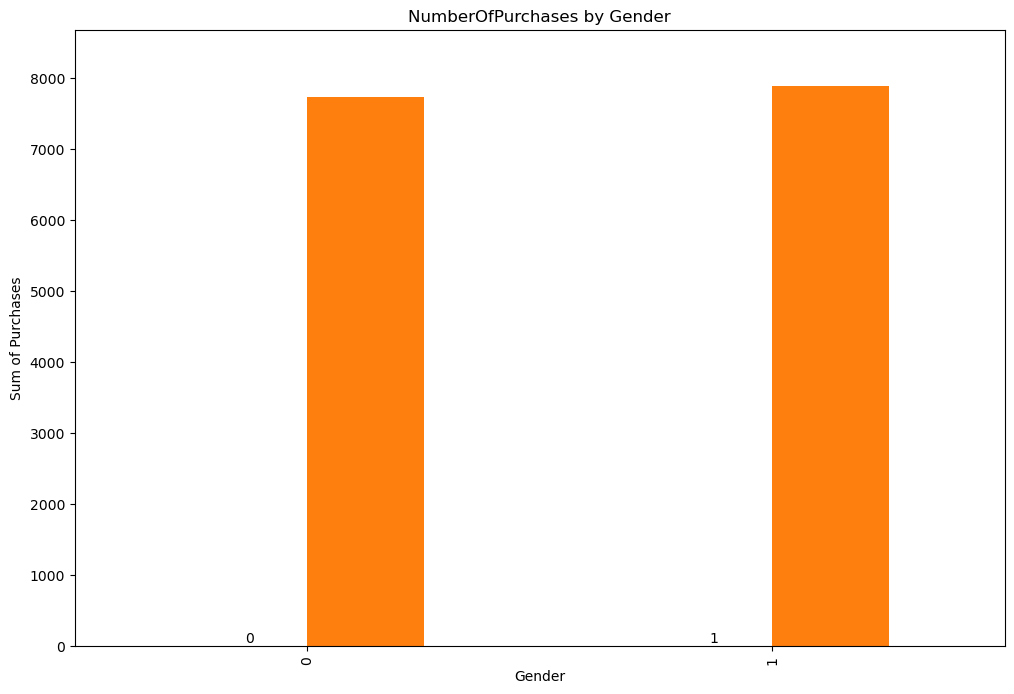

In [112]:
bar_show('Gender','NumberOfPurchases')

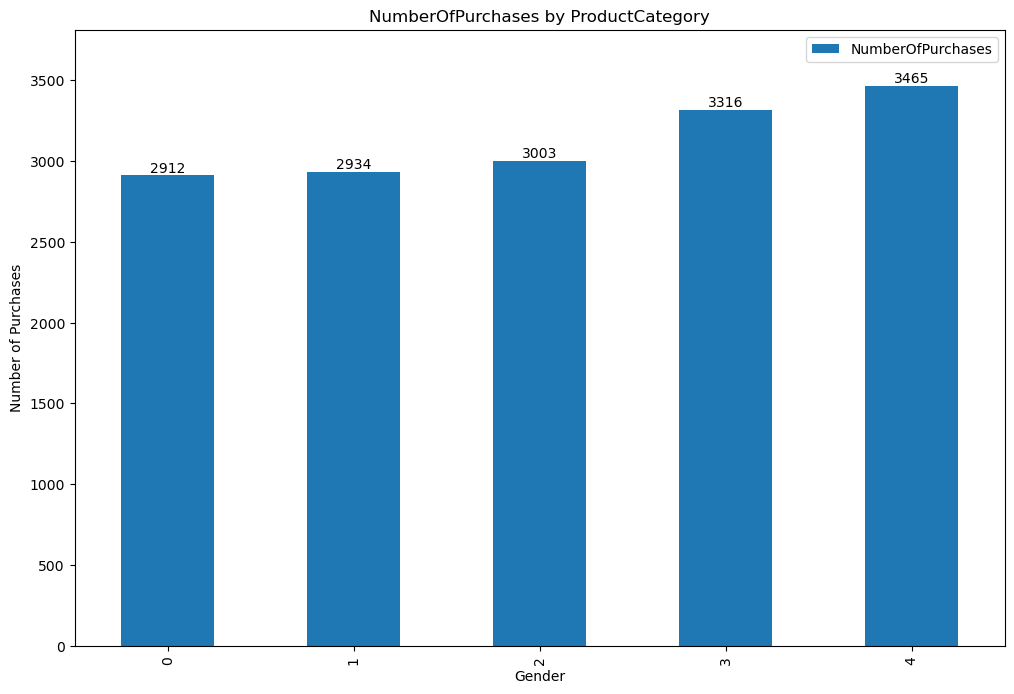

In [75]:
bar_show('ProductCategory','NumberOfPurchases')

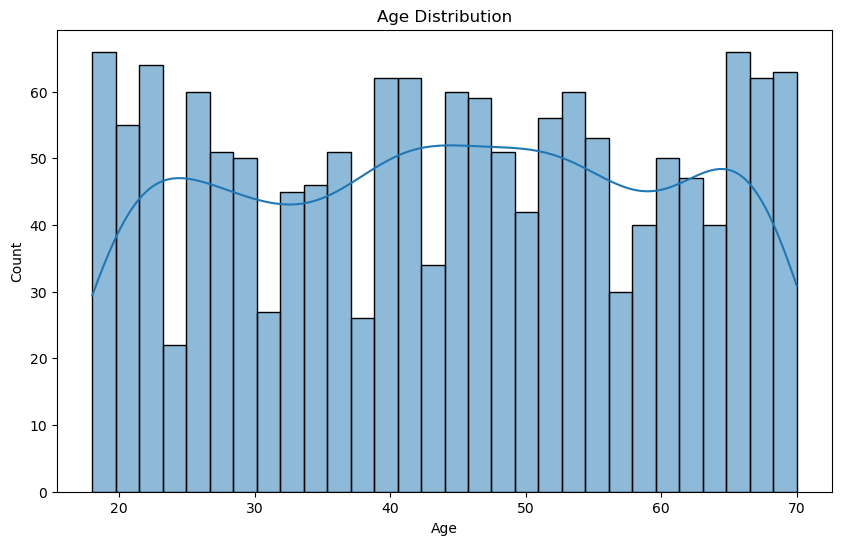

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

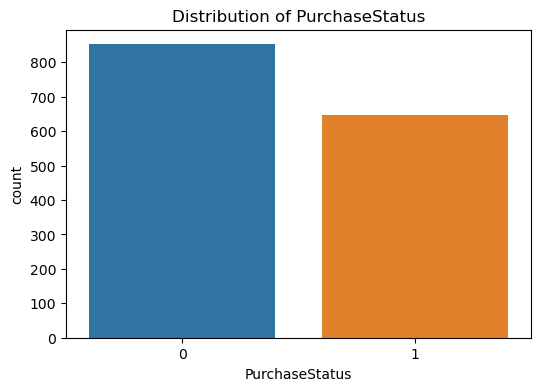

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of PurchaseStatus')
plt.show()

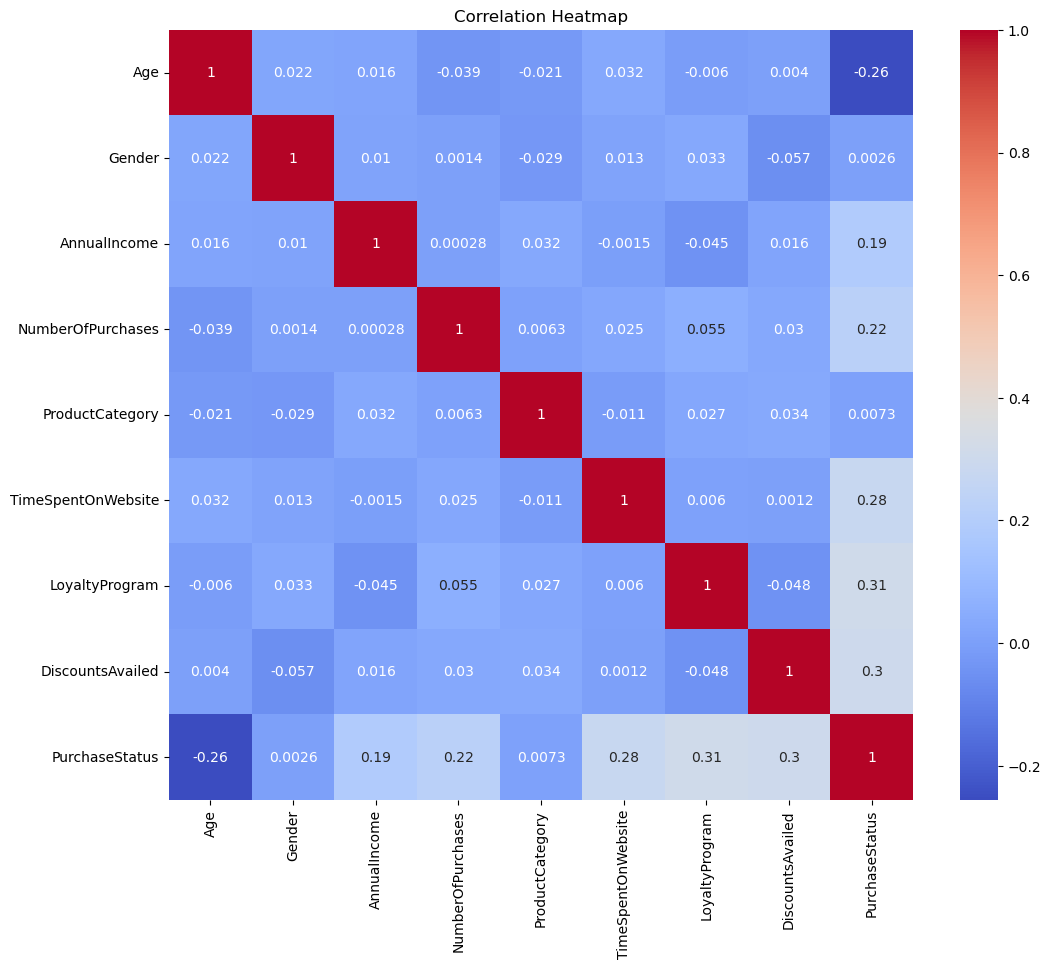

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Observations
##### -The dataset contains more females tha males
##### -The females also made more purchases
##### -The Sports section made more sales with Electronics making the least sales 
##### -It was noticed from the heatmap that as Age increases, Purchase status decreases
##### -It was also deducted that as Age increases, Number of Purchases reduces 
##### -It shows that people that buys beauty and sports products don't spend much time on the website, while Electronics, clothing and Home goods spend the most times on the website

### Model

In [127]:
x= df.drop('PurchaseStatus',axis=1)
y = df['PurchaseStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Decision Tree Classifier Method

The accuracy of the model is :90.33333333333333
The precision of the model is :93.80530973451327


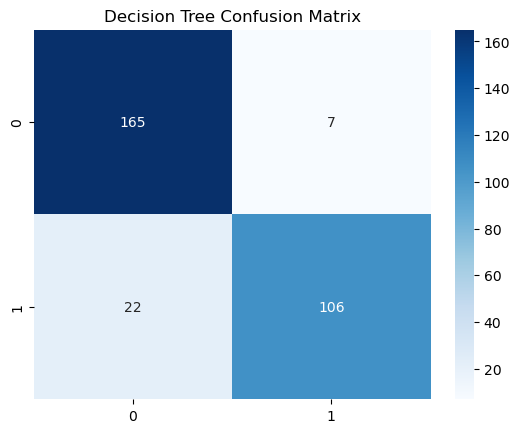

In [148]:
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions= model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
cm_dt = confusion_matrix(y_test, predictions)
print(f"The accuracy of the model is :{accuracy*100}")
print(f"The precision of the model is :{precision*100}")
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#### Logistic Regression Method

The accuracy of the model is :70.0 %
The precision of the model is :66.10169491525424 %


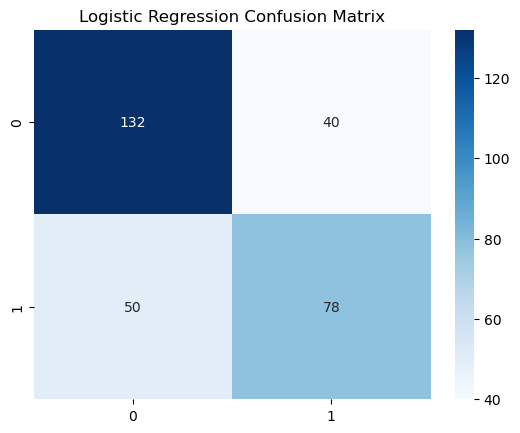

In [149]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
prediction_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,prediction_lr)
precision_lr= precision_score(y_test,prediction_lr)
cm_lr = confusion_matrix(y_test, prediction_lr)
print(f"The accuracy of the model is :{accuracy_lr*100} %")
print(f"The precision of the model is :{precision_lr*100} %")
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Support Vector Machine method

The accuracy of the model is :58.333333333333336 %
The precision of the model is :51.09489051094891 %


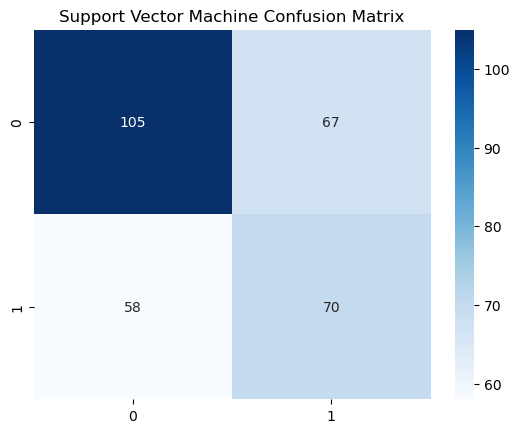

In [165]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
prediction_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test,prediction_svc)
precision_svc= precision_score(y_test,prediction_svc)
cm_svc = confusion_matrix(y_test, prediction_svc)
print(f"The accuracy of the model is :{accuracy_svc*100} %")
print(f"The precision of the model is :{precision_svc*100} %")
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

#### Naive-Bayes Method

The accuracy of the model is :81.0 %
The precision of the model is :84.46601941747572 %


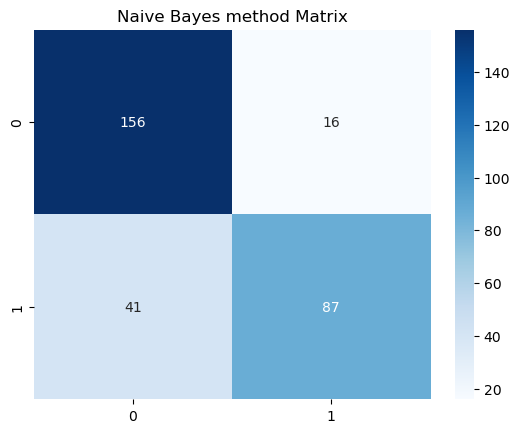

In [170]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
prediction_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test,prediction_nb)
precision_nb= precision_score(y_test,prediction_nb)
cm_nb = confusion_matrix(y_test, prediction_nb)
print(f"The accuracy of the model is :{accuracy_nb*100} %")
print(f"The precision of the model is :{precision_nb*100} %")
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes method Matrix')
plt.show()

#### Random Forest Method

The accuracy of the model is :95.33333333333334 %
The precision of the model is :99.13793103448276 %


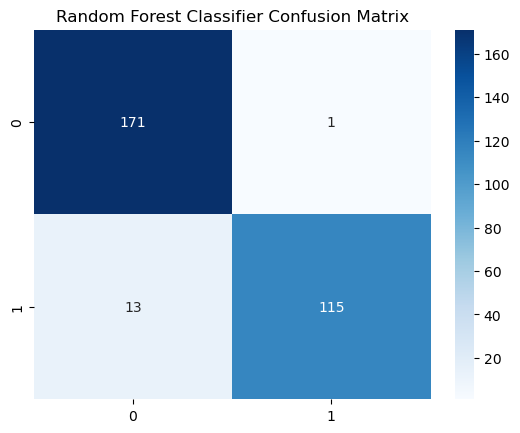

In [171]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
prediction_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test,prediction_rf)
precision_rf= precision_score(y_test,prediction_rf)
cm_rf = confusion_matrix(y_test, prediction_rf)
print(f"The accuracy of the model is :{accuracy_rf*100} %")
print(f"The precision of the model is :{precision_rf*100} %")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

### Conclusion
##### This Random Forest Classification method model produces the highest accuracy of 95% while also having a 99% precision